# Part I - (Ford GoBike System Dataset)
## by (Emmanuel Chisom Egwuonwu)

## Introduction

> Ford GoBike System Dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in the year 2019. This dataset contains 16 columns and 183412 data entries (rows). The features of this dataset are grouped into three main areas namely:
1. Trip Duration
2. Station Information
3. Members Personal Information

> The aim of this Exploratory Data Analysis is to thoroughly explore the main features of this dataset and visualize the relationship between the features using Univariate plots, Bivariate plots and Multivariate plots. 

## Preliminary Wrangling


### Importing Relevant Libraries

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

# Repress Warning
import warnings
warnings.simplefilter("ignore")

### Loading the Dataset

In [2]:
# Load the Dataset
ford_bike = pd.read_csv("201902-fordgobike-tripdata.csv")
ford_bike.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

### Assessing the Dataset

In [3]:
# information on the dataset
ford_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
# Shape of the dataset
ford_bike.shape

(183412, 16)

In [5]:
# Sum of null entries in each column
ford_bike.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
# Checking sum of duplicated entries
ford_bike.duplicated().sum()

0

In [7]:
# Datatypes of the columns
ford_bike.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [8]:
# Value counts of the users
ford_bike.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [9]:
# value counts of the member gender
ford_bike.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [10]:
# Desscription of the trip duration
ford_bike.duration_sec.describe()

count    183412.000000
mean        726.078435
std        1794.389780
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64

### Some Issues Observed

> 1. The Dataset contains incorrect datatypes for start and end time.
> 2. The dataset contains null entries

### Cleaning the Dataset

In [11]:
# Create a copy of the dataset
ford_gobike = ford_bike.copy()


#### Fixing Missing Entries

In [12]:
# Filling null entries in these columns with 'None'
ford_gobike.start_station_name.fillna("None", inplace = True)
ford_gobike.end_station_name.fillna("None", inplace = True)
ford_gobike.member_gender.fillna("None", inplace = True)

#Filling null entries in these columns with '0'
ford_gobike.start_station_id.fillna(0, inplace = True)
ford_gobike.end_station_id.fillna(0, inplace = True)

#Fill null entries with the mean
ford_gobike.member_birth_year.fillna(ford_gobike.member_birth_year.mean(), inplace = True)



In [13]:
# Check sum of null entries
ford_gobike.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

####  Correcting the datatypes

In [14]:
# Convert the start and end time to datetime
ford_gobike.start_time = pd.to_datetime(ford_gobike.start_time)
ford_gobike.end_time = pd.to_datetime(ford_gobike.end_time)

# Convert user_type and member_gender to category datatype
ford_gobike.user_type = ford_gobike.user_type.astype('category')
ford_gobike.member_gender = ford_gobike.member_gender.astype('category')

# Convert member birth year to integer
ford_gobike.member_birth_year = ford_gobike.member_birth_year.astype(int)

In [15]:
# Checking the datatypes
ford_gobike.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                   int32
member_gender                    category
bike_share_for_all_trip            object
dtype: object

#### Add some relevant columns to the dataset

In [16]:
# Add columns for hour of day, day of week and member age
ford_gobike['start_hour'] = ford_gobike.start_time.dt.strftime('%H')
ford_gobike['start_day'] = ford_gobike.start_time.dt.strftime('%A')
ford_gobike['member_age'] = 2019 - ford_gobike['member_birth_year']


In [17]:
# Changing the datatype of the days of the week
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_categ = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
ford_gobike['start_day'] = ford_gobike['start_day'].astype(weekday_categ)

In [18]:
ford_gobike.head()

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
1         42521 2019-02-28 18:53:21.789 2019-03-01 06:42:03.056   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer               1984   
1            -122.393170     2535    Customer               1984   
2            -122.404904     5905    Customer               1972   
3            -122.444293     6638  Subscriber               1989   
4            -122.248780     4898  Subscriber               1974   

  member_gender bike_share_for_all_trip start_hour start_day  member_age  
0          Male                      No         17  Thursday          35  
1          None                      No         18  Thursday          35  
2          Male                      No         12  Thursday          47  
3         Other                      No         17  Thursday          30  
4          Male                     Yes         23  Thursday          45

### What is the structure of your dataset?

> The Dataset contains 183412 rows and 16 columns.The columns are ('duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude' ,'end_station_longitude', 'bike_id, user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip'). The dataset contains integer, float, object and boolean datatypes. 

### What is/are the main feature(s) of interest in your dataset?

> The main features of the dataset that are of interest in this exploration are:
1. The Age group, user type and gender that has high trip duration or riding minutes.
2. The time of the day, day of the week or month of the year that has the highest number of trips.
3. The features on which trip duration depends on.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> 1. The trip details ('duration_sec', 'start_time', 'end_time')
> 2. The member personal information ('user_type', 'member_gender', 'member_birth_year')
> 3. The station information (the start and end station details)

## Univariate Exploration





### Question: 

> What is the distribution of trip duration?

### Visualization

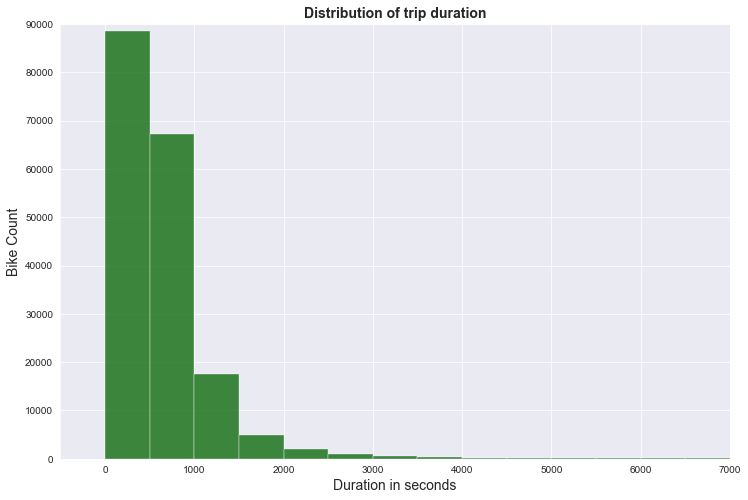

In [19]:
# Plot a histogram showing distribution of trip duration
sns.set_style("darkgrid")

def figure_basics(title: str, xlabel = str, ylabel = str):
    plt.figure(figsize = [12, 8])
    plt.title(title, fontsize=14, fontweight = 'bold')
    plt.xlabel(xlabel, fontsize = 14)
    plt.ylabel(ylabel, fontsize = 14)

figure_basics('Distribution of trip duration', 'Duration in seconds', 'Bike Count')
binsize = 500
bins = np.arange(0, ford_gobike['duration_sec'].max()+binsize, binsize)
sns.histplot(data = ford_gobike, x= 'duration_sec', bins = bins, color = 'darkgreen')
plt.xlim(-500, 7000)
plt.ylim(0, 90000)
plt.show()

### Observation:

> The graph plotted above shows that the highest bike count was gotten between trip duration of 0 and 500 seconds. It can also be observed that most of the bike counts are taken for trip duration below 30 minutes.This bike count represent over 95%  of the total bike counts.

### Question:

> What is the age distribution of the members?

### Visualization

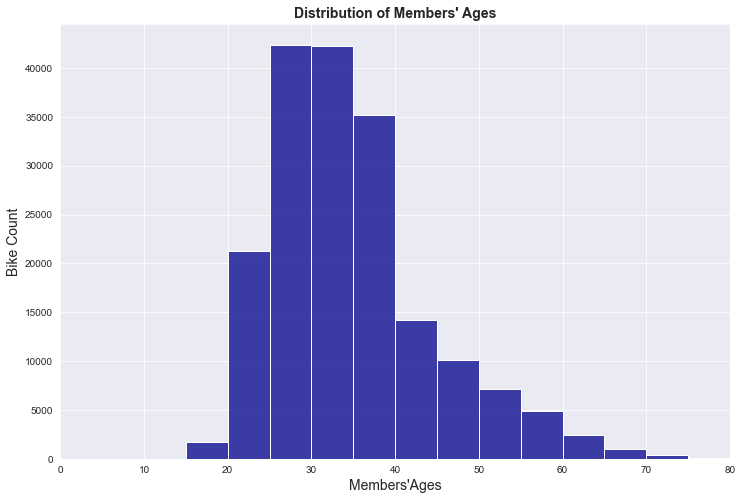

In [20]:
# Plotting a histogram to depict the members' age distribution
figure_basics("Distribution of Members' Ages", "Members'Ages", 'Bike Count')
binsize = 5
bins = np.arange(10, ford_gobike['member_age'].max()+binsize, binsize)
sns.histplot(data = ford_gobike.member_age, bins=bins, color = "darkblue" );
plt.xlim(0, 80)
plt.show()

### Observation:

> It can be observed from this histogram that most of the bike riders are between the ages of 25 and 35 years. The least count of bike riders are gotten between the age group of 70-80 years.

### Question:

> What is the distribution of the member gender? 

### Visualization

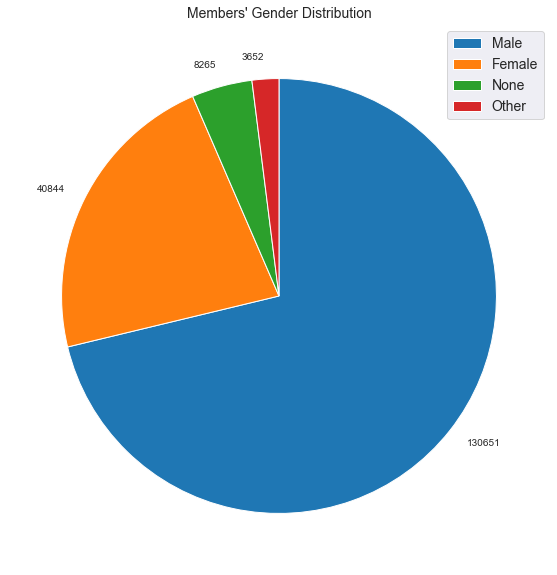

In [21]:
# Plotting a piechart to show the gender distribution
gender_count = ford_gobike['member_gender'].value_counts()

plt.figure(figsize = [10, 10])
plt.pie(gender_count, labels=gender_count.values, startangle=90, counterclock=False)
plt.title("Members' Gender Distribution", fontsize=14)
plt.legend(gender_count.index, fontsize = 14)
plt.show()

### Observation:

> The piechart represented above shows that male riders are the majority bike riders with a count of 130651, followed by the female riders with a bike count of 40844.

### Question:

> What is the distribution of the users?

### Visualization

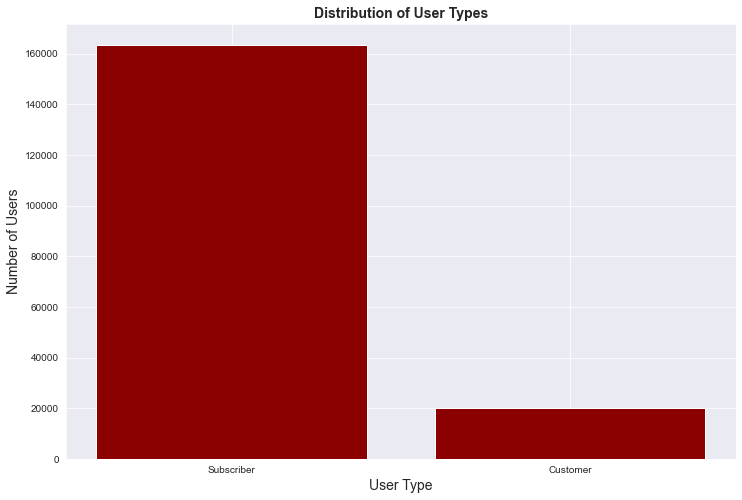

In [22]:
# plotting a bar chart to show the distribution of user types
figure_basics("Distribution of User Types", "User Type", 'Number of Users')
plt.bar(x = ford_gobike.user_type.value_counts().keys(), height = ford_gobike.user_type.value_counts(),
            color = "darkred" );
plt.show()

### Observation:

> The barplot shown above depicts that most of the bike riders are subscribers. The subscribers constitute over 87% of the total number of users while the customers constitute the remaining 13%. 

### Question:

> What hour of the day has the highest and lowest bike trip?

### Visualization

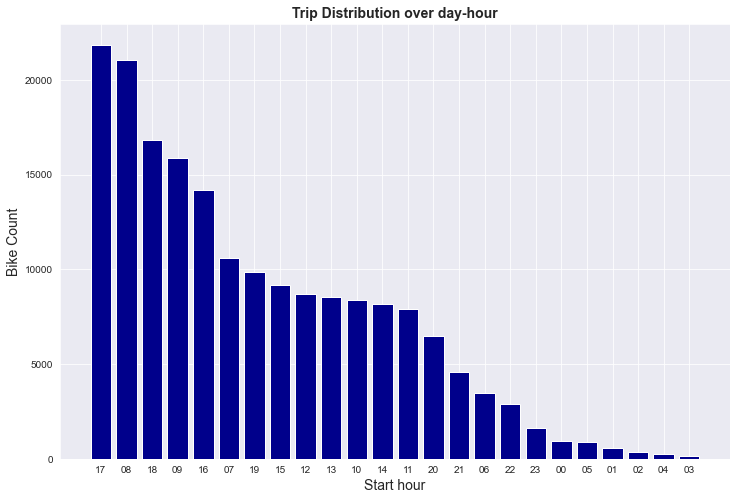

In [23]:
# Plotting a bar chart to show the trip distribution over day-hour
figure_basics("Trip Distribution over day-hour", "Start hour", 'Bike Count')
plt.bar(x = ford_gobike.start_hour.value_counts().keys(), height = ford_gobike.start_hour.value_counts(),
              color = "darkblue", );
plt.show()

### Observation:

> The barplot shown above represent the distribution of the trip during the hours of the day. It can be observed that the peak hour with the highest bike riders is 5pm when most employees and students have closed from their day's activities. Another peak hour is recorded at 8am when most students are going to school and most employees are going to work.


### Question

> What day of the week has the highest and lowest bike trip?

### Visualization

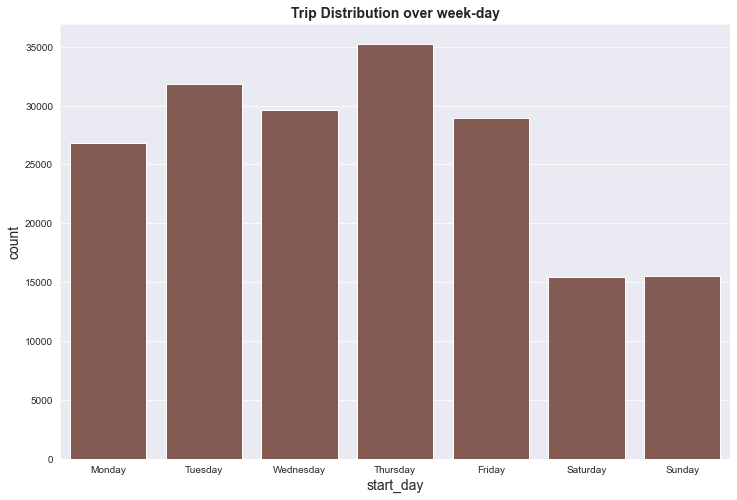

In [24]:
# Plotting a bar chart to show the trip distribution over week-day
figure_basics("Trip Distribution over week-day", "Start day", 'Bike Count')
sns.countplot(data = ford_gobike, x= 'start_day', color = "tab:brown", );
plt.show()

### Observation:

> It can be clearly observed from the countplot that the highest count of bike riders is obtained on Thursday of the week and the lowest counts are obtained during the weekends (Saturday and Sunday).

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> 1. The distribution of trip duration shows that the highest bike count was gotten between trip duration of 0 and 500 seconds. It can also be observed that most of the bike counts are taken for trip duration below 30 minutes.This bike count represent over 95%  of the total bike counts.

> 2. It can be observed from the Ages distribution that most of the bike riders are between the ages of 25 and 35 years. The least count of bike riders are gotten between the age group of 70-80 years.

> 3. The Members' Gender distribution shows that male riders are the majority bike riders with a count of 130651, followed by the female riders with a bike count of 40844.

> 4. The User Types distribution depicts that most of the bike riders are subscribers. The subscribers constitute over 87% of the total number of users while the customers constitute the remaining 13%. 

> 5. The barplot for the distribution of the trip during the hours of the day shows that the peak hour with the highest bike riders is 5pm when most employees and students have closed from their day's activities. Another peak hour is recorded at 8am when most students are going to school and most employees are going to work.

> 6. The barplot for the trip distribution over week-day shows that the highest count of bike riders is obtained on Thursday of the week and the lowest counts are obtained during the weekends (Saturday and Sunday).

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> 1. Yes, some outliers were observed in the age group and the a limit was used to group the ages from 0-80 years. The Members Ages column was gotten by subtracting the Members' brith year from the year of compilation of the dataset(2019).

> 2. New columns were formed to extract the ride start hour and week in order to get a very good perception of the date of the trip.

## Bivariate Exploration



### Question:

> What is the duration of the trip in relation to the gender of the members?

### Visualization

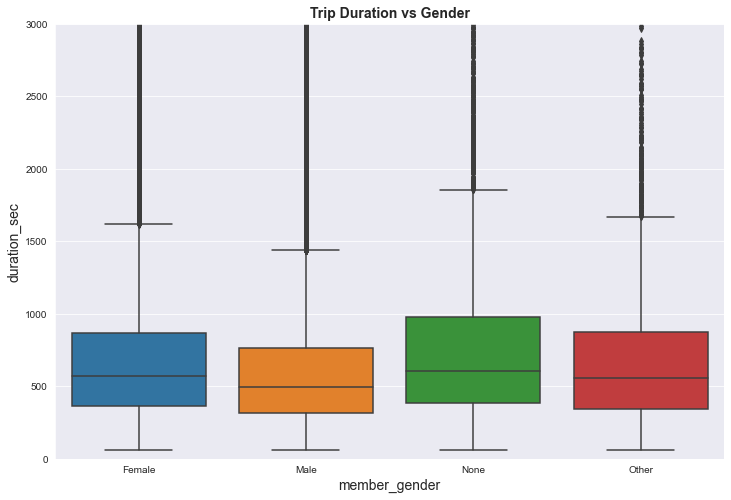

In [26]:
# Plotting a boxplot showing the relationship between the member gender and trip duration
figure_basics("Trip Duration vs Gender", "Member Gender", 'Trip Duration (sec)')
sns.boxplot(data = ford_gobike, x = "member_gender", y = "duration_sec")
plt.ylim(0, 3000)
plt.show()

### Observation:

> It can be observed from the boxplot that the female members have the highest trip duration compared to the male members. Members with other gender also have a high trip duration.

### Question:

> What is the relationship between the trip duration and the user type?

### Visualization

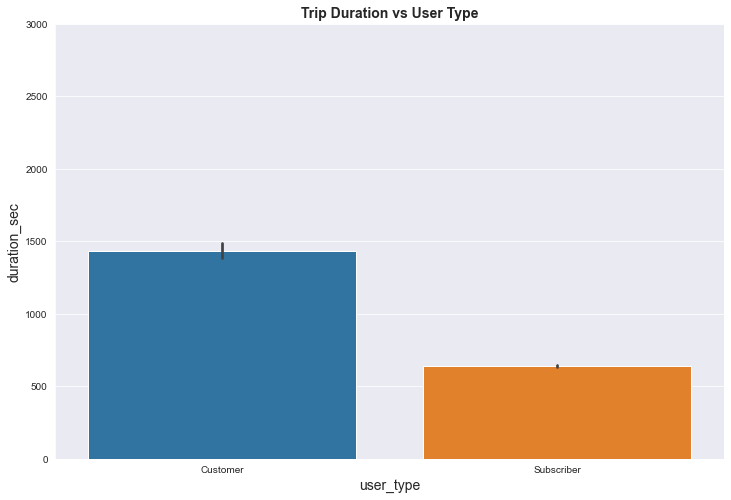

In [27]:
# Plotting a boxplot showing the relationship between the user type and trip duration
figure_basics("Trip Duration vs User Type", "User Type", 'Trip Duration (sec)')
sns.barplot(data = ford_gobike, x = "user_type", y = "duration_sec")
plt.ylim(0, 3000)
plt.show()

### Observation:

> The barplot shown above indicates that customers have higher trip durations compared to the subscribers.

### Question:

> How many members are male subscribers and female customers?

### Visualization

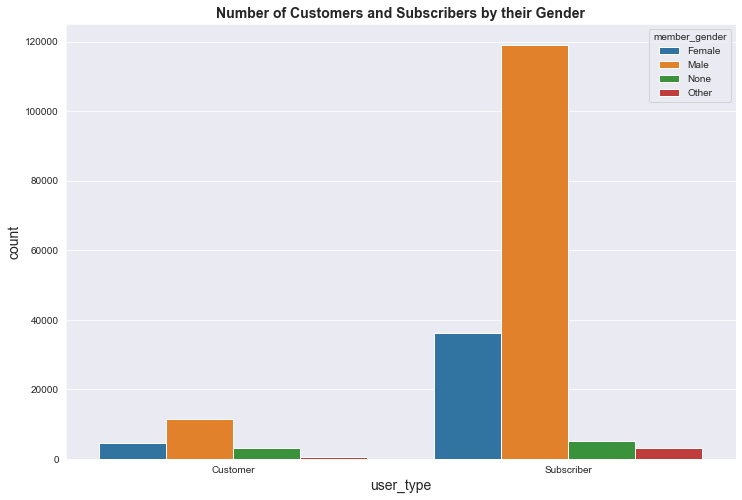

In [28]:
# Plotting a countplot that shows number of customers and subscribers by their gender
figure_basics("Number of Customers and Subscribers by their Gender", "User Type", 'Count')
sns.countplot(data = ford_gobike, hue = "member_gender", x = "user_type")
plt.show()

### Observation:

> The countplot plotted above shows that there are more male subscribers compared to the male customers. There are also more female subscribers than female customers. In a nustshell, there are more subscribers than customers. 

### Question:

> What is the Age distribution for Members' Gender?

### Visualization

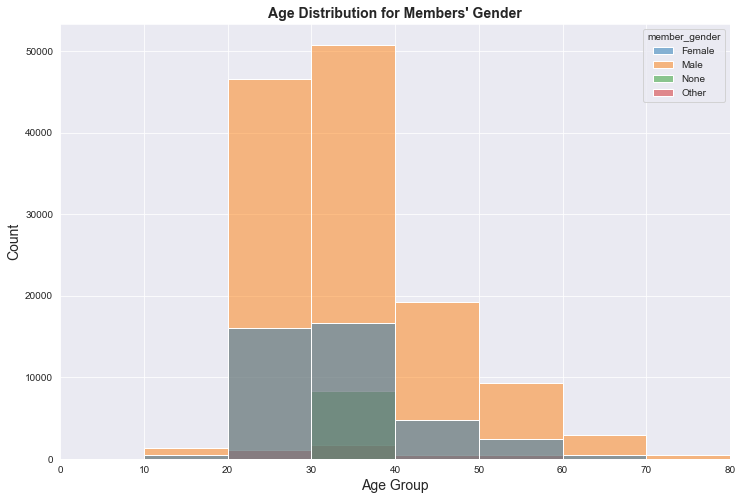

In [29]:
# plotting a histogram to show the age distribution for members' gender
binsize = 10
bins = np.arange(10, ford_gobike['member_age'].max()+binsize, binsize)

figure_basics("Age Distribution for Members' Gender", "Age Group", 'Count')
sns.histplot(data = ford_gobike, hue = "member_gender", x = "member_age", bins = bins)
plt.xlim(0, 80)
plt.show()

### Observation:

> The histogram shown above depicts that there are over 50000 male bike riders within the age group of 30-40 years and over 17000 female bike riders within the age group of 30-40years. The distribution shows that the highest bike riders are between the ages of 20-40years.

### Question:

> What is the Age distribution for the User Types?

### Visualization

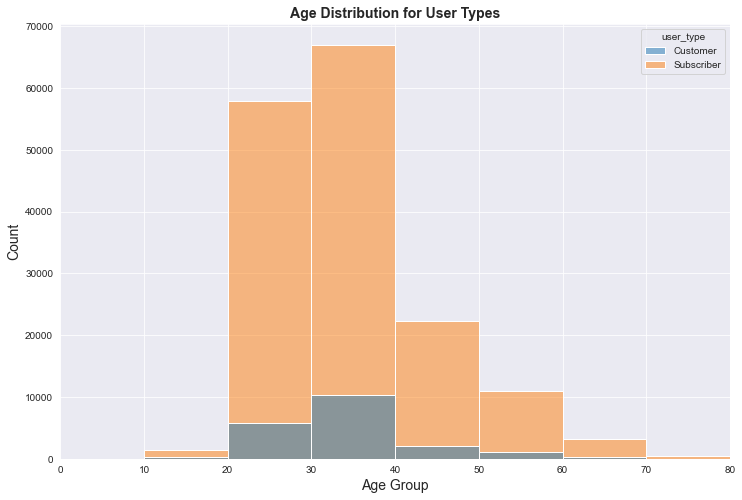

In [30]:
# plotting a histogram to show the age distribution for user types
binsize = 10
bins = np.arange(10, ford_gobike['member_age'].max()+binsize, binsize)

figure_basics("Age Distribution for User Types", "Age Group", 'Count')
sns.histplot(data = ford_gobike, hue = "user_type", x = "member_age", bins = bins)
plt.xlim(0, 80)
plt.show()

### Observation:

> This distribution depicts that there are more subscribers than customers. The highest peak of subscribers are found between the ages dof 30-40years and the highest peak of customers are found between that same age group. The lowest bike riders are between the ages of 70-80 years.

### Question:

> What is the relationship between the trip duration and the members' ages?

### Visualization

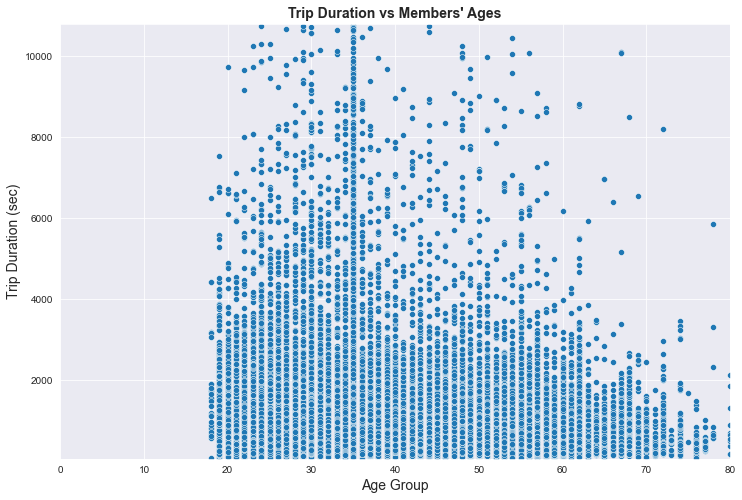

In [31]:
# Plotting a scatterplot to show the relationship between the trip duration and the ages of the members
figure_basics("Trip Duration vs Members' Ages", "Age Group", 'Trip Duration (sec)')
sns.scatterplot(data = ford_gobike, y = "duration_sec", x = "member_age")
plt.xlim(0, 80)
plt.ylim(60, 10800)
plt.show()


### Observation:

> The scatterplot shows that young members between the ages of 25 and 40 years have higher trip duration compared to the older members.

### Question:

> What is the distribution of the Trip Duration for each day of the week?

### Visualization

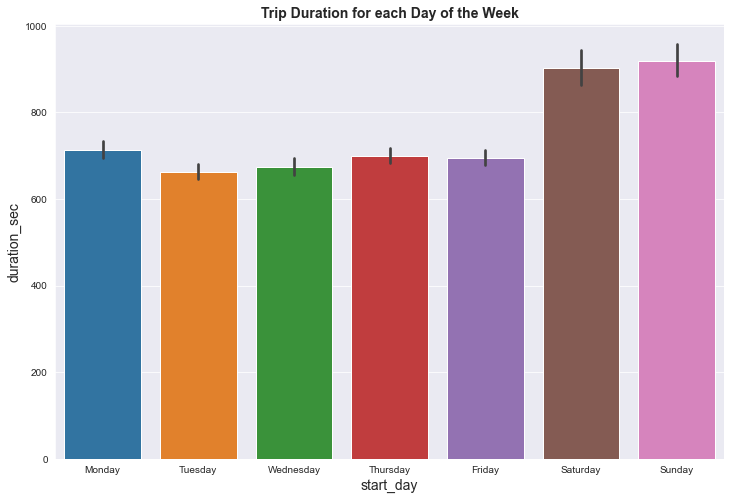

In [32]:
# Plotting a barplot showing the distribution of trip duration for the days of the week
figure_basics("Trip Duration for each Day of the Week", "Day of Week", 'Trip Duration (sec)')
sns.barplot(data = ford_gobike, x = "start_day" , y = "duration_sec" )
plt.show()

### Observation:

> The barplot shown above indicates that during the weekends (Saturday and Sunday), the bike riders have longer trip duration compared to the week days.

### Question 

> What is the Trip distribution over the hours of the day in relation to the user type?

### Visualization

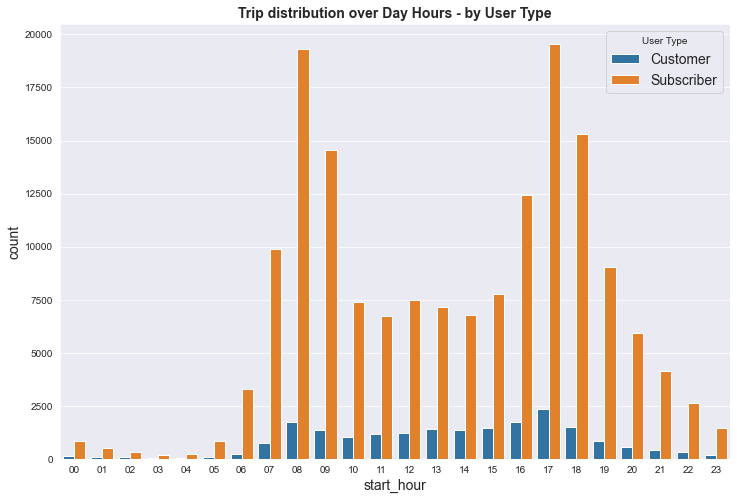

In [33]:
# plotting a countplot showing the trip distribution over hours of the day by the user type
figure_basics("Trip distribution over Day Hours - by User Type", "Hours in a Day", 'Ride Count')
sns.countplot(data = ford_gobike, x = ford_gobike.start_hour.sort_values(), hue = "user_type")
plt.legend(title= "User Type", fontsize=14)
plt.show()

### Observation:

> It can be seen from this trip distribution that within the early hours of 8am amd 9am and within the late hours of 5pm and 6pm, there are more bike riders who are subscribers compared to the customers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> 1. It can be observed from the boxplot plotted for the distribution of the trip duration in relation to Members' gender that the female members have the highest trip duration compared to the male members. Members with other gneder also have a high trip duration.

> 2. The barplot plotted for trip duration vs user type shows that customers have higher trip durations compared to the subscribers.

> 3. The countplot plotted for the User Types  grouped by their gender shows that there are more male subscribers compared to the male customers. There are also more female subscribers than female customers. In a nustshell, there are more subscribers than customers. 

> 4. The histogram plotted for the members' gender and age group depicts that there are over 50000 male bike riders within the age group of 30-40 years and over 17000 female bike riders within the age group of 30-40years. The distribution shows that the highest bike riders are between the ages of 20-40years.

> 5. The scatterplot for the trip duration vs age group shows that young members between the ages of 25 and 40 years have higher trip duration compared to the older members.

> 6. The barplot plotted for the trip duration during the week days indicates that during the weekends (Saturday and Sunday), the bike riders have longer trip duration compared to the week days.



## Multivariate Exploration



### Question

> What is the relationship between the trip duration and the user type during the days of the week?

### Visualization

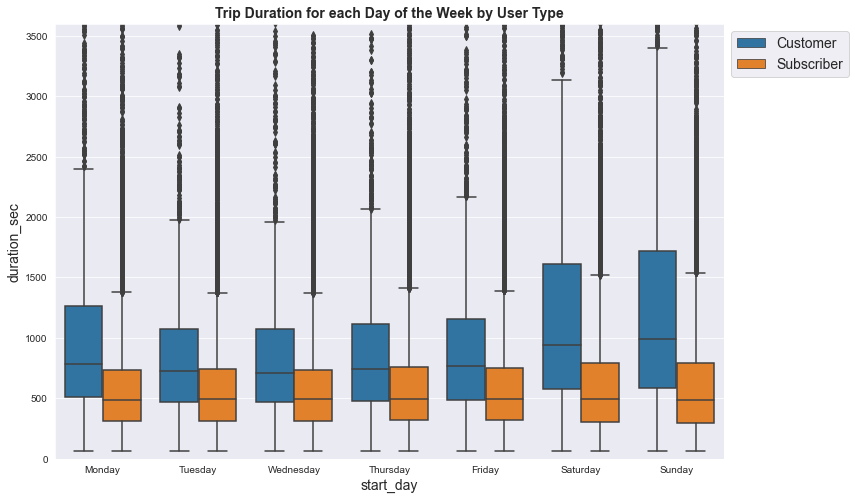

In [34]:
# Plotting a boxplot that shows the distribution of trip duration for each day of the week by user type
figure_basics("Trip Duration for each Day of the Week by User Type", "Day of Week", 'Trip Duration (sec)')
sns.boxplot(data = ford_gobike, x = "start_day" , y = "duration_sec", hue = "user_type" )
plt.ylim(0, 3600)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Observation:

> It can be observed from the boxplot above that customers have longer trip duration than the subscribers consistently throughout the week days and higher trip durations were recorded during the weekends (Saturday and Sunday).

### Question:

> What is the relationship between the trip duration and the user type during the hours of the day?

### Visualization

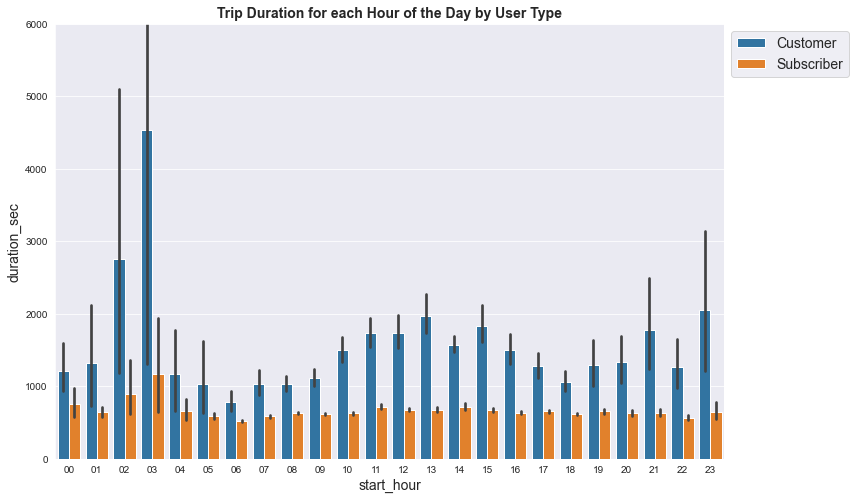

In [35]:
# Plotting a barplot that shows the distribution of trip duration for each hour of the day by user type
figure_basics("Trip Duration for each Hour of the Day by User Type", "Ride Hour", 'Trip Duration (sec)')
sns.barplot(data = ford_gobike, x = ford_gobike.start_hour.sort_values() , y = "duration_sec", hue = "user_type" )
plt.ylim(0, 6000)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Observation:

> The barplot shown above shows that during the early hours of 2am and 3am, customers had longer trip durations compared to subscribers. Longer trip durations are also observed at late hours of 11pm.

### Question:

> What is the correlation between the User Type, the Gender and the Ride hour of the day?

### Visualization

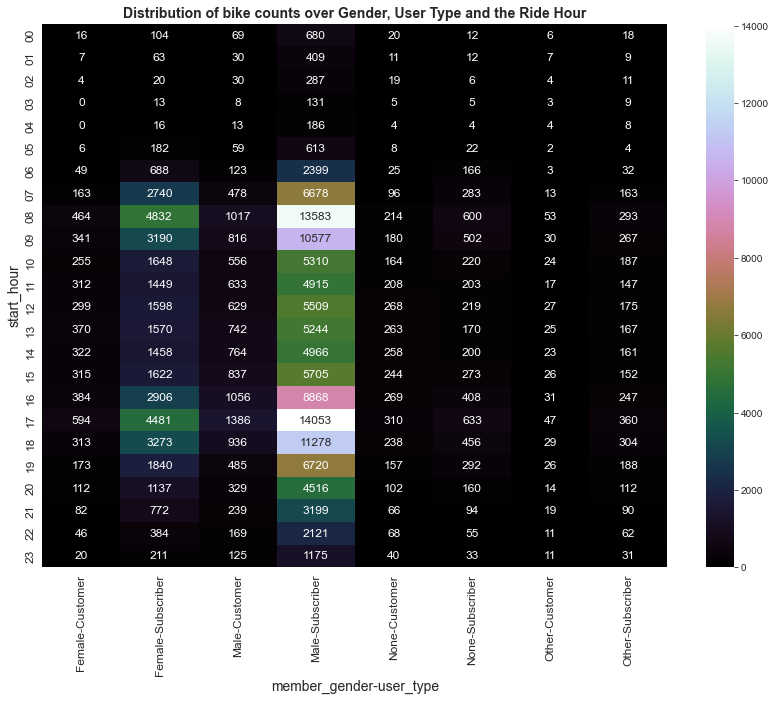

In [36]:
# Grouping the data using, Hour, Gender, and User Type
data_group = ford_gobike.groupby(['start_hour', 'member_gender', 'user_type']).size().reset_index(name='count')
# fixing the layout of the dataset
data_group = data_group.pivot(index='start_hour', columns=['member_gender', 'user_type'], values = 'count')

#Defining a function to specify plot details
def plot_basics(title: str, xlabel = str, ylabel = str):
    plt.figure(figsize = [14, 10])
    plt.title(title, fontsize=14, fontweight = 'bold')
    plt.xlabel(xlabel, fontsize = 14)
    plt.ylabel(ylabel, fontsize = 14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

plot_basics('Distribution of bike counts over Gender, User Type and the Ride Hour', 'Gender - User Type', 'Hour of the Day')

# plotting the graph
sns.heatmap(data_group, annot=True, annot_kws = {'fontsize' : 12}, fmt='.0f', cmap='cubehelix')
plt.show()

### Observation:

>The heatmap shows a breakdown of the number of bike riders during each hour of the day grouped according to the gender and type of user. It can be observed that the male and female subscribers are the highest bike riders suring the early hours of 8-9am and late evenings (5-6pm). 

### Question:

>  What is the correlation between the User Type, the Gender and the Ride day of the week?

### Visualization

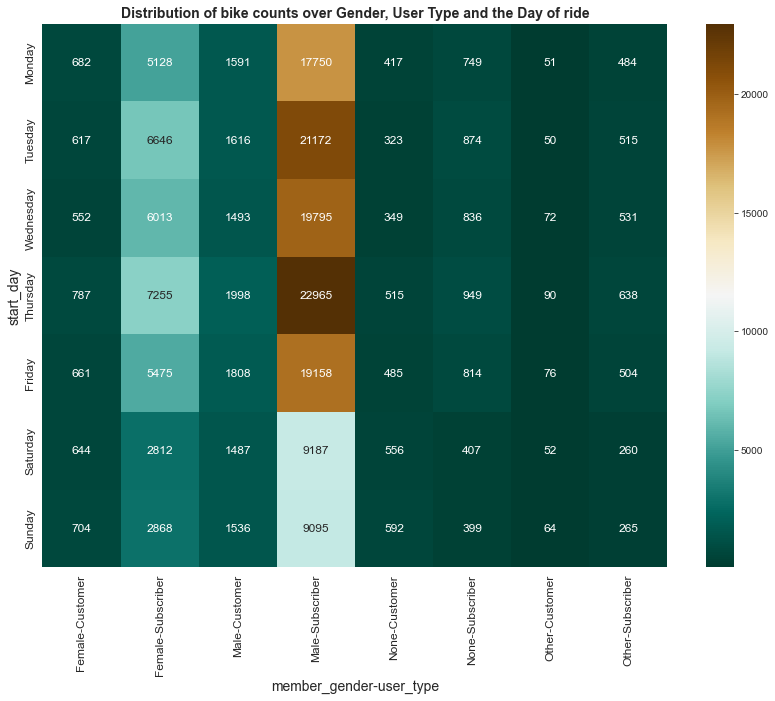

In [37]:
# Grouping the data using, Hour, Gender, and User Type
mask_group = ford_gobike.groupby(['start_day', 'member_gender', 'user_type']).size().reset_index(name='count')
# fixing the layout of the dataset
mask_group = mask_group.pivot(index='start_day', columns=['member_gender', 'user_type'], values = 'count')

# plotting the graph
plot_basics('Distribution of bike counts over Gender, User Type and the Day of ride', 'Gender - User Type', 'Days of the Week')
sns.heatmap(mask_group, annot=True, annot_kws = {'fontsize' : 12}, fmt='.0f', cmap='BrBG_r')

plt.show()

### Observation:

> The heatmap shown above shows a relationship between the Members' gender, the user type and the day of the ride. It is obseerved that male subscribers has the highest rides on thursday seconded by the demale subscribers. The male and female customers usually ride bikes consistently throughout the week.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The boxplot plotted for the trip duration vs the user type shows that customers have longer trip duration than the subscribers consistently throughout the week days and higher trip durations were recorded during the weekends (Saturday and Sunday).

> The barplot shows that during the early hours of 2am and 3am, customers had longer trip durations compared to subscribers. Longer trip durations are also observed at late hours of 11pm.

> It is observed from the heatmap that the male and female subscribers are the highest bike riders suring the early hours of 8-9am and late evenings (5-6pm)

## Conclusions
> The FordGoBike System Dataset was loaded and programmatically assessed to pinpoint any issues with the dataset. the Dataset was accurately cleaned based on the issues identified. During the exploration phase, the Dataset was explored using univariate, bivariate and multivariate plots to extensively present the relationship between the features of the dataset.

  ### Summary of Key Findings

> In the course of this data exploration, many features of the dataset were explored in order to find the relationship between the features of the trip and the main features of interest (Bike Count and Trip Duration). 
> 1. It was seen from the exploration that most bike riders are between the ages of 25 and 40 years. This age group represent the youths who could either be college students or employees and have a higher trip durations compared to the much younger bike riders and older ones.  
> 2. It was observed that the peak hour with the highest bike riders is 5pm when most employees and students have closed from their day's activities. Another peak hour is recorded at 8am when most students are going to school and most employees are going to work. The trip distribution shows that within the early hours of 8am amd 9am and within the late hours of 5pm and 6pm, there are more bike riders who are subscribers compared to the customers.
> 3. The visualization shows that over 87% of the bike riders are subscribers while the remaining 13% are customers. It can be seen that customers have higher trip durations compared to the subscribers. Customers' trips lasted for about 20-25 minutes while subscribers' trips lasted for about 10 minutes. This could mean that subcribers rent out bikes for official purposes while customers rent out bikes for fun or for business purposes such as delivery. 
> 4. The exploration also shows that male riders are the majority bike riders with a count of 130651, followed by the female riders with a bike count of 40844, yet female riders have a longer trip duration compared to the male riders.
> 5. The visualization shows that long trip durations are recorded during the weekends (Saturday and Sunday) while the peak count of bike riders is gotten on thursday.